# Word2Vec Assignment
Alexandria Benedict 11/7

In [6]:
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
import matplotlib
import pandas as pd

In [2]:
matplotlib.use("TkAgg")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1

In [7]:
df1 = pd.read_csv('CONcreTEXT_trial_EN.tsv', sep='\t', header=None, engine= 'python')
df2 = pd.read_csv('CONcreTEXT_trial_IT.tsv', sep='\t', header=None, engine= 'python')

### Remove the stopwords

In [26]:
engSent = list(df1[3][1:])
#print(engSent)

In [27]:
stop_words = []

stop_words_temp = map(lambda x : re.sub('\n','',x),engSent)
stop_words = map(lambda x:  re.sub('[^A-Za-z0-9]+', '',x), stop_words_temp)


In [28]:
stop_words

In [29]:
type(stop_words)

map

In [30]:
def clean(word):
    word = word.strip()
    word = word.lower()
    word = re.sub('[^A-Za-z0-9]+', '', word)
    if word not in stop_words:
        return word
    else:
        return ''

In [16]:
line_count = 0
sentences = []
        

for line in engSent:
    if line is not None or line != '\n':
        words = line.split()
        words = map(lambda x: clean(x), words)
        words = list(filter(lambda x:True if len(x) > 0 else False, words))
        sentences.append(words)



for line in engSent:
    if line is not None or line != '\n':
        words = line.split()
        words = map(lambda x: clean(x), words)
        words = list(filter(lambda x:True if len(x) > 0 else False, words))
        sentences.append(words)

In [17]:
type(sentences)

list

In [18]:
sentences[100:102]

[['bring',
  'up',
  'academic',
  'achievements',
  'awards',
  'and',
  'other',
  'milestones',
  'in',
  'your',
  'life'],
 ['please',
  'list',
  'people',
  'you',
  'have',
  'helped',
  'your',
  'personal',
  'achievements',
  'or',
  'troublesome',
  'times',
  'you',
  'have',
  'overcome']]

## Word2Vec model

In [19]:
model = Word2Vec(sentences, window=5, size=500, workers=4, min_count=5)

In [20]:
model.wv.vocab

{'and': <gensim.models.keyedvectors.Vocab at 0x1a2293e198>,
 'other': <gensim.models.keyedvectors.Vocab at 0x1a2293ef60>,
 'in': <gensim.models.keyedvectors.Vocab at 0x1a2293eef0>,
 'your': <gensim.models.keyedvectors.Vocab at 0x1a22956198>,
 'life': <gensim.models.keyedvectors.Vocab at 0x1a229560b8>,
 'people': <gensim.models.keyedvectors.Vocab at 0x1a22956080>,
 'you': <gensim.models.keyedvectors.Vocab at 0x1a229561d0>,
 'have': <gensim.models.keyedvectors.Vocab at 0x1a229567f0>,
 'or': <gensim.models.keyedvectors.Vocab at 0x1a22956128>,
 'carbon': <gensim.models.keyedvectors.Vocab at 0x1a22956470>,
 'to': <gensim.models.keyedvectors.Vocab at 0x1a229564e0>,
 'when': <gensim.models.keyedvectors.Vocab at 0x1a22956550>,
 'a': <gensim.models.keyedvectors.Vocab at 0x1a229564a8>,
 'the': <gensim.models.keyedvectors.Vocab at 0x1a229565f8>,
 'for': <gensim.models.keyedvectors.Vocab at 0x1a22956710>,
 'that': <gensim.models.keyedvectors.Vocab at 0x1a22956780>,
 'of': <gensim.models.keyedvecto

In [21]:
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)
    


/Users/uhaldar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


### TSNE plot to find the similarity of words

In [22]:
tsne_model = TSNE(perplexity=250, n_components=2, init='pca', n_iter=250)

In [23]:
new_values = tsne_model.fit_transform(tokens)

In [24]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
  

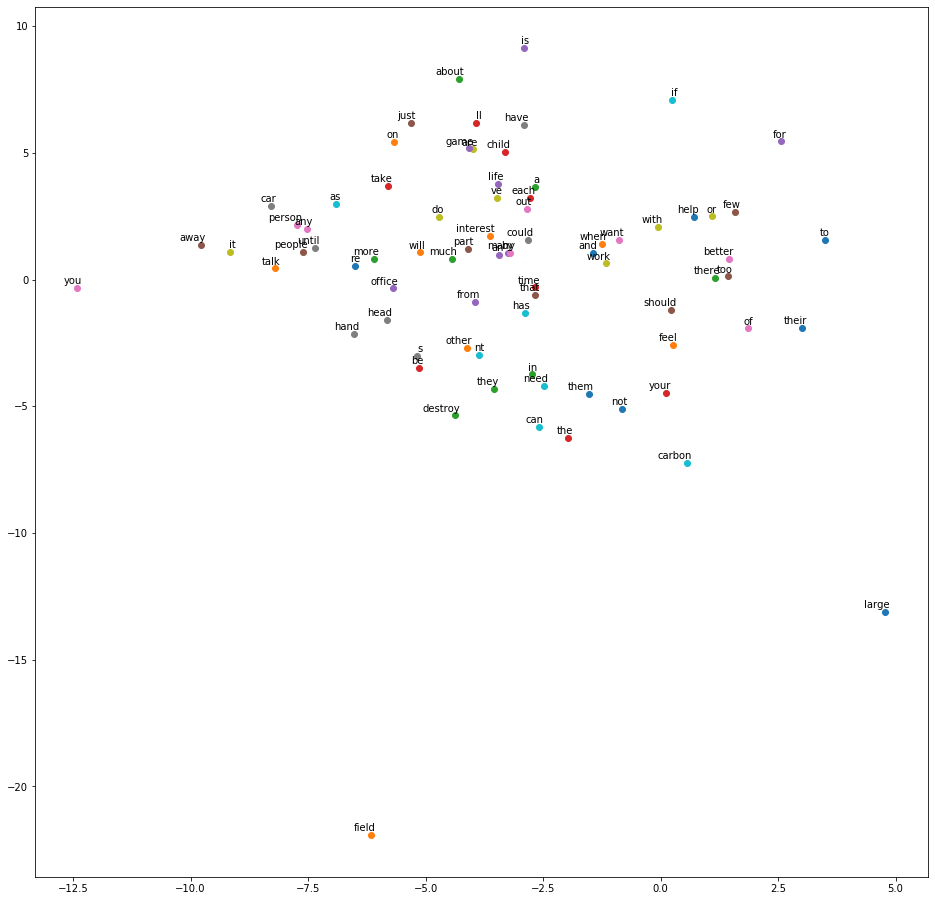

In [25]:
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
  plt.scatter(x[i],y[i])
  plt.annotate(labels[i],
  xy=(x[i], y[i]),
  xytext=(5, 2),
  textcoords='offset points',
  ha='right',
  va='bottom')

In [34]:
model.most_similar(positive=['person','child'])

/Users/uhaldar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('or', 0.1224995031952858),
 ('with', 0.11964101344347),
 ('few', 0.11849404871463776),
 ('to', 0.11637897044420242),
 ('ve', 0.11237978935241699),
 ('you', 0.10825229436159134),
 ('when', 0.10768623650074005),
 ('the', 0.09886939823627472),
 ('about', 0.0965258851647377),
 ('on', 0.09424860775470734)]

In [37]:
model.doesnt_match("field person any until people".split())

/Users/uhaldar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.


'any'

# Question 2
I think that the quality of the embeddings could be better. For some of the tests, it doesn't seem to be making correct judgements; for example, when running the doesnt_match method. According to the plot, the words 'person', 'any', 'until', and 'people' are all very close together in a cluster, and 'field' is not. In this list of words, it judges that the word 'any' does not belong the most in this list. Another example is when testing the most_similar method to show which words are closest to 'person' and 'child', it returns a list of words which do not have similar meanings. I chose those two words expecting the model to return 'people', but it did not.

# Question 3
Subsampling Frequent Words is important in this example because it would allow us to remove frequent words which are unneeded. Words like this would be 'the', 'or', 'to', and so on. This is important for our model because these frequent words would have the highest frequencies and make it harder for us to find actual similar words to nouns such as 'person' and 'child' (such as in the code snippet above). Negative sampling is also important for our model because for ever training sample, all the weights on the neural network would be modified slightly. Negative sampling instead only chooses a small percentage of the samples and modifying those weights, therefore making it so larger vocabulary sizes will be less effected on a large scale.